# The Sparks Foundation - GRIP - Data Science and Business Analytics 

TASK 2 : Prediction using unsupervised ML

Author : Mohit Giri Goswami

Dataset used: Iris dataset, which is available in sklearn library.

Problem Statement :
Predict the optimum number of clusters and represent it visually.

# Import required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Read the data

In [3]:
mydata = pd.read_csv('C:\\Users\\35gos\\Desktop\\Iris.csv')
mydata

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
mydata.shape

(150, 6)

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# dropping Id column

mydata.drop('Id', axis=1, inplace=True)
mydata.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
print(mydata.isnull().sum(), '\n\nNumber of duplicate rows: ' , mydata.duplicated().sum())   # check for nulls & duplicates

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Number of duplicate rows:  3


In [10]:
## drop duplicate rows

mydata.drop_duplicates(inplace=True)  

mydata.shape[0]  # gives number of rows. Similarly, data.shape[1] will give number of columns

## now number of rows left 147, earlier there were 150 rows.

147

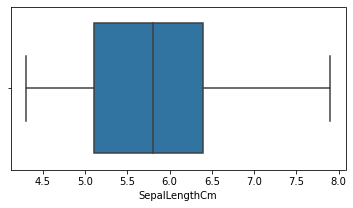

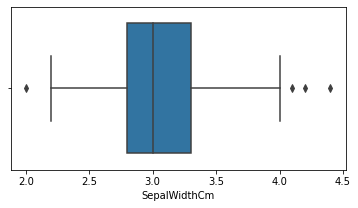

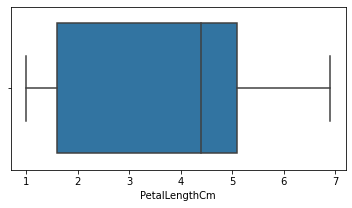

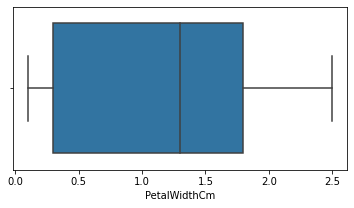

In [11]:
## Check for any outliers in the numeric data
for i in mydata.columns:
    if mydata[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(mydata[i])
        plt.show()

In [13]:
## Treating outliers present in the SepalWidthCm column

q1,q3 = np.percentile(mydata['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
mydata['SepalWidthCm'] = mydata['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)

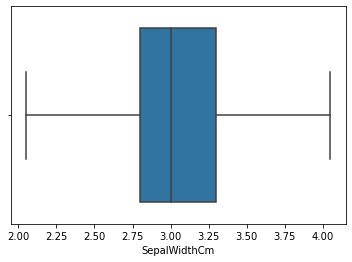

In [15]:
sns.boxplot(mydata['SepalWidthCm']);

# Understanding the data

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


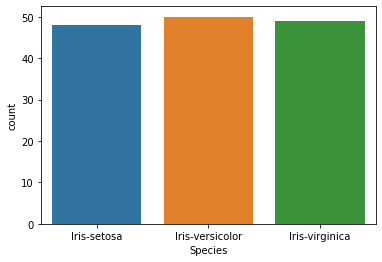

In [17]:
## Target class
print(mydata.Species.value_counts())
sns.countplot(mydata.Species);

In [19]:
mydata.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [20]:
mydata.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

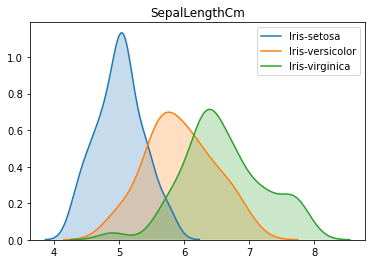

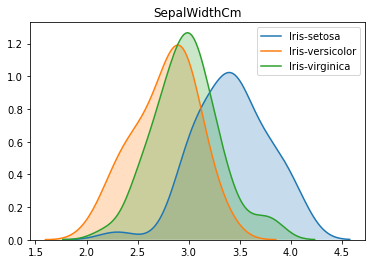

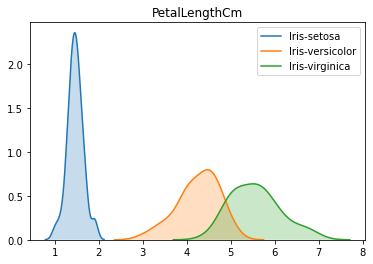

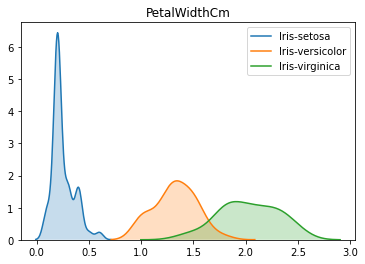

In [21]:
# Distributions of features by Species

for i in mydata.columns[:-1]:
    
    sns.kdeplot(data = mydata.loc[mydata.Species=='Iris-setosa'][i], label="Iris-setosa", shade=True)
    sns.kdeplot(data = mydata.loc[mydata.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)
    sns.kdeplot(data = mydata.loc[mydata.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)
    plt.title(i);
    plt.show()

In [22]:
## Inference: We can not distinguish between the species based on Sepal Length/Width 
              # but we can clearly tell setosa apart from the other species based on Petal Length/Width

In [24]:
## Correlation Matrix

mydata.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


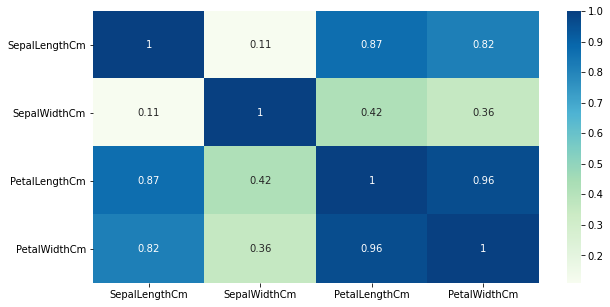

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(mydata.corr()), cmap='GnBu', annot=True);

# K-means clustering

In [26]:
from sklearn.cluster import KMeans

In [27]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(mydata.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

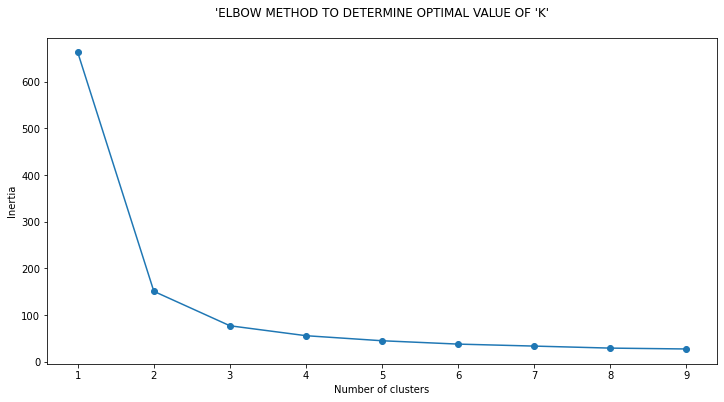

In [28]:
df = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n");

In [29]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(mydata.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.90327869, 2.75      , 4.38196721, 1.42622951],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [30]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [31]:
mydata['cluster'] = kmeans.labels_

mydata

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [32]:
display(mydata['cluster'].value_counts(), mydata['Species'].value_counts())

0    61
1    48
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

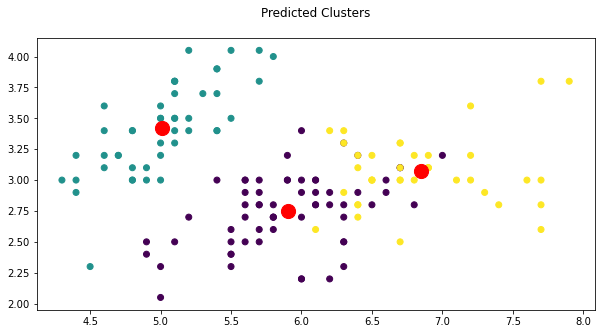

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(mydata['SepalLengthCm'], mydata['SepalWidthCm'], c=mydata.cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=200, c='red', label = 'Centroids')
plt.show()

In [34]:
mydata.loc[mydata['Species']=='Iris-setosa']['cluster'].value_counts() ## the model has identified iris-setosa with 100% accuracy

1    48
Name: cluster, dtype: int64

In [35]:
mydata.loc[mydata['Species']=='Iris-versicolor']['cluster'].value_counts()

0    48
2     2
Name: cluster, dtype: int64

In [36]:
mydata.loc[mydata['Species']=='Iris-virginica']['cluster'].value_counts()

2    36
0    13
Name: cluster, dtype: int64

In [37]:
mydata['Species_encoded'] = mydata['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
mydata

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [38]:
from sklearn.metrics import classification_report
print(classification_report(mydata['Species_encoded'],mydata['cluster']))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        50
           1       1.00      1.00      1.00        48
           2       0.95      0.73      0.83        49

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



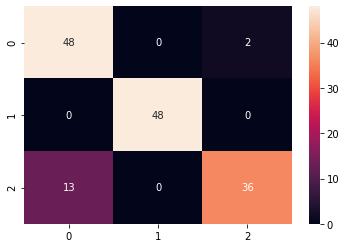

In [39]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(mydata['Species_encoded'],mydata['cluster']), annot=True);